# Linear Regression , Ridge and Lasso

In [27]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score , KFold
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
    

In [16]:
boston = fetch_openml(name="boston", version=1, as_frame=True)
df = boston.frame
df.head(3)


c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


<!-- 'CRIM',   # per capita crime rate by town
'ZN',     # proportion of residential land zoned for lots over 25,000 sq.ft.
'INDUS',  # proportion of non-retail business acres per town
'CHAS',   # Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
'NOX',    # nitric oxides concentration (parts per 10 million)
'RM',     # average number of rooms per dwelling
'AGE',    # proportion of owner-occupied units built prior to 1940
'DIS',    # weighted distances to five Boston employment centres
'RAD',    # index of accessibility to radial highways
'TAX',    # full-value property-tax rate per $10,000
'PTRATIO',# pupil-teacher ratio by town
'B',      # 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
'LSTAT'   # % lower status of the population
'MEDV '  #Median value of owner-occupied homes in $1000's -->

In [17]:
# Dividing the dataset into independent and dependent features
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [18]:
X = X.astype(float)
y = pd.to_numeric(y)


## Linear Regression

MSE in each fold: [24.29111947 20.86790094 26.39596869 23.40122508 22.48676421]
Average MSE: 23.488595677968643


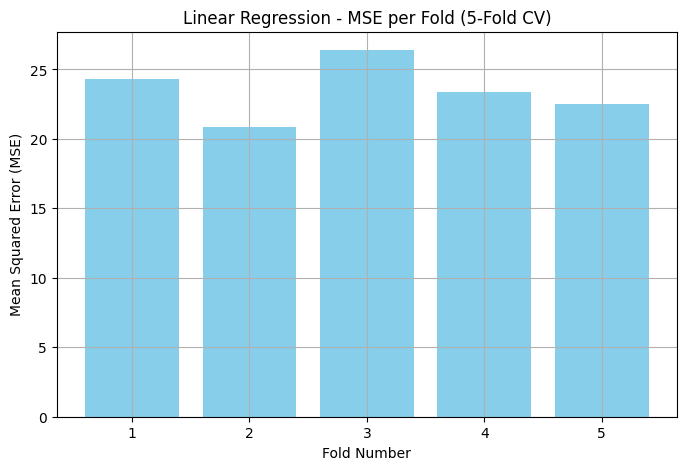

In [29]:
# Define model
model = LinearRegression()

# Define 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
# Internally: LinearRegression is trained 5 times on different train/test splits
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kf)

# Convert negative MSE to positive
mse_scores = -scores

print("MSE in each fold:", mse_scores)
print("Average MSE:", mse_scores.mean())

plt.figure(figsize=(8, 5))
plt.bar(range(1, len(mse_scores) + 1), mse_scores, color='skyblue')
plt.xlabel('Fold Number')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Linear Regression - MSE per Fold (5-Fold CV)')
plt.grid(True)
plt.show()

## RidgeRegression

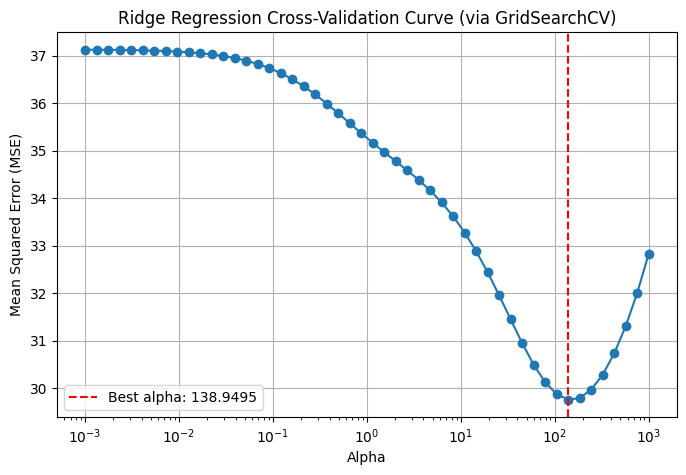

In [25]:
# Define grid of alphas
alphas = np.logspace(-3, 3, 50)

# Use GridSearchCV
ridge = Ridge()
param_grid = {'alpha': alphas}
grid = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=5)
grid.fit(X, y)

# Plot CV curve
mean_mse = -grid.cv_results_['mean_test_score']
plt.figure(figsize=(8, 5))
plt.semilogx(alphas, mean_mse, marker='o')
plt.axvline(grid.best_params_['alpha'], color='red', linestyle='--', label=f'Best alpha: {grid.best_params_["alpha"]:.4f}')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Ridge Regression Cross-Validation Curve (via GridSearchCV)')
plt.legend()
plt.grid(True)
plt.show()

## LassoRegression

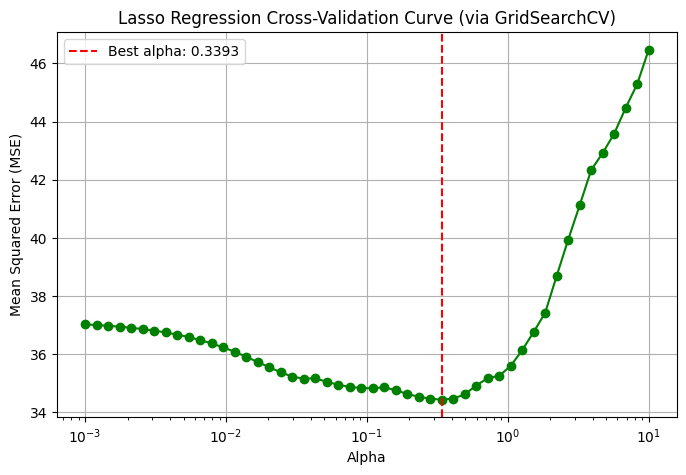

In [28]:
# Define grid of alphas
alphas = np.logspace(-3, 1, 50)  # For Lasso, higher alphas can quickly zero out coefficients

# Set up Lasso and GridSearchCV
lasso = Lasso(max_iter=10000) 
param_grid = {'alpha': alphas}

lasso_grid = GridSearchCV(lasso, param_grid, scoring='neg_mean_squared_error', cv=5)
lasso_grid.fit(X, y)

# Get MSE for each alpha
lasso_mean_mse = -lasso_grid.cv_results_['mean_test_score']

# Plot
plt.figure(figsize=(8, 5))
plt.semilogx(alphas, lasso_mean_mse, marker='o', color='green')
plt.axvline(lasso_grid.best_params_['alpha'], color='red', linestyle='--',
            label=f'Best alpha: {lasso_grid.best_params_["alpha"]:.4f}')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Lasso Regression Cross-Validation Curve (via GridSearchCV)')
plt.legend()
plt.grid(True)
plt.show()